**Compare time to numpy and tenswerflow after using GPU**



In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
import time


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
shape =5000

In [ ]:
np_array = np.random.uniform(size = [shape, shape])

In [ ]:
np_array

array([[0.64539774, 0.60918938, 0.01652837, ..., 0.91498939, 0.06585977,
        0.87019832],
       [0.05220432, 0.8828919 , 0.36718537, ..., 0.80849922, 0.35612145,
        0.60703868],
       [0.3352459 , 0.34153227, 0.8972993 , ..., 0.91880736, 0.43298836,
        0.43703524],
       ...,
       [0.17313831, 0.1457475 , 0.55792284, ..., 0.24536349, 0.1902024 ,
        0.29144676],
       [0.47050112, 0.60619229, 0.02599004, ..., 0.3497643 , 0.10490296,
        0.94506633],
       [0.57838118, 0.45593125, 0.1727968 , ..., 0.62013805, 0.65251641,
        0.21526975]])

In [ ]:
start=time.time()

for i in range(10):
  np.matmul(np_array,np_array)

end = time.time()

time_period = end-start

print(f'{time_period} seconds')

78.66501545906067 seconds


In [ ]:
tf_array = tf.random.uniform([shape,shape])

In [ ]:
start=time.time()

for i in range(10):
  tf.matmul(tf_array,tf_array)

end = time.time()

time_period = end-start

print(f'{time_period} seconds')

0.1286604404449463 seconds


**Loss funtions for regerssions**

In [ ]:
import tensorflow as tf
y_true = [0.0,0.5,0.7,1.0]
y_pred = [0.2,0.3,0.9,0.7]

mse = tf.keras.losses.MeanSquaredError()
result = mse(y_true,y_pred).numpy()
print(f"Mean Squarred Error :{result}")

Mean Squarred Error :0.05249999836087227


In [ ]:
y_true = [0.0,0.5,0.7,1.0]
y_pred = [0.2,0.3,0.9,0.7]

mae = tf.keras.losses.MeanAbsoluteError()
result = mae(y_true,y_pred).numpy()
print(f"Mean Absolute Error :{result}")

Mean Absolute Error :0.22499999403953552


In [ ]:
y_true = [0.0,0.5,0.7,1.0]
y_pred = [0.2,0.3,0.9,0.7]

huber = tf.keras.losses.Huber(delta=0.25)
result = huber(y_true,y_pred).numpy()
print(f"Huber Loss :{result}")

Huber Loss :0.025937499478459358


**Loss functions for Classification**

In [ ]:
import tensorflow as tf

y_true = [0, 1, 0, 0]
y_pred = [0.3, 0.6, 0.7, 0.1]

bce = tf.keras.losses.BinaryCrossentropy()
result = bce(y_true, y_pred).numpy()

print(f"Binary Cross Entropy: {result}")


Binary Cross Entropy: 0.544208288192749


In [ ]:
y_true = [[0,1,0],[0,0,1]]
y_pred = [[0.05,0.95,0],[0.1,0.8,0.1]]

cce = tf.keras.losses.CategoricalCrossentropy()
result = cce(y_true, y_pred).numpy()

print(f"Categorical Cross Entropy: {result}")


Categorical Cross Entropy: 1.1769392490386963


In [ ]:
y_true = [1,2]
y_pred = [[0.05,0.95,0],[0.1,0.8,0.1]]

scce = tf.keras.losses.SparseCategoricalCrossentropy()
result = scce(y_true, y_pred).numpy()

print(f"Sparse Categorical Cross Entropy: {result}")


Sparse Categorical Cross Entropy: 1.1769392490386963


# **Regression Neural Network**



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
data = pd.read_csv("Linear Regression.csv")

In [6]:
data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [7]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [7]:
data.shape

(300, 2)

In [8]:
x=data['x']
y=data['y']

In [9]:
x

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

In [10]:
y

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

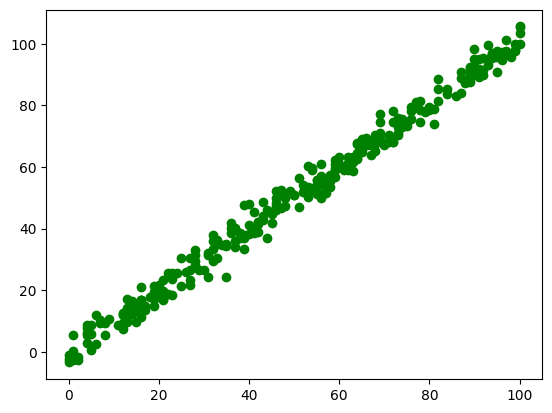

In [11]:
plt.scatter(x, y, c='g')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
x_train.shape,x_test.shape

((210,), (90,))

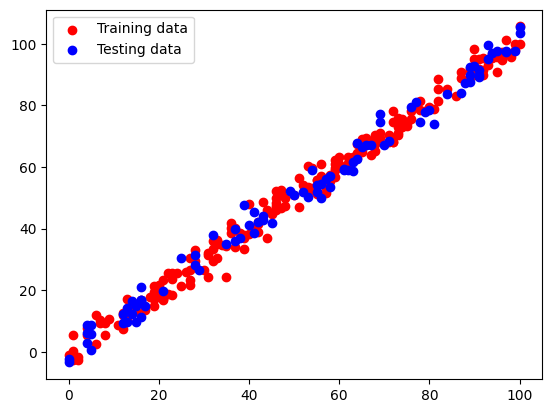

In [22]:
plt.scatter(x_train, y_train, c='r', label='Training data')
plt.scatter(x_test, y_test, c='b', label='Testing data')
plt.legend()
plt.show()

**Building the model**

In [43]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# train the model
epoch_number = 4
history = model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/4
7/7 [==============================] - 1s 3ms/step - loss: 20.3455 - mae: 20.3455
Epoch 2/4
7/7 [==============================] - 0s 2ms/step - loss: 4.7051 - mae: 4.7051
Epoch 3/4
7/7 [==============================] - 0s 3ms/step - loss: 6.3640 - mae: 6.3640
Epoch 4/4
7/7 [==============================] - 0s 2ms/step - loss: 3.0416 - mae: 3.0416


In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 8         
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
y_predictions = model.predict(x_test)
y_predictions

3/3 [==============================] - 0s 5ms/step


array([[ 95.8611    ],
       [ 80.89524   ],
       [100.13706   ],
       [  4.9969664 ],
       [ 96.93008   ],
       [106.550995  ],
       [  3.9279766 ],
       [ -0.34798205],
       [ 15.686864  ],
       [ 33.859688  ],
       [ 16.755854  ],
       [ 68.06736   ],
       [ 12.479894  ],
       [ 39.20464   ],
       [ 99.06807   ],
       [106.550995  ],
       [ 64.86039   ],
       [ 47.756554  ],
       [ 37.066658  ],
       [ 45.618576  ],
       [ 55.239475  ],
       [103.344025  ],
       [ 40.273624  ],
       [ 22.100803  ],
       [ 44.54958   ],
       [ 53.1015    ],
       [ 26.376759  ],
       [ 75.55029   ],
       [ 99.06807   ],
       [  4.9969664 ],
       [ 14.617872  ],
       [ 52.032513  ],
       [ 85.17119   ],
       [103.344025  ],
       [ 58.44645   ],
       [ -0.34798205],
       [101.20605   ],
       [ 71.27434   ],
       [ 74.48129   ],
       [ 56.30847   ],
       [ 96.93008   ],
       [ 86.24018   ],
       [ 16.755854  ],
       [ 13

In [30]:
y_predictions[0:5]

array([[39.3038   ],
       [33.20063  ],
       [41.04756  ],
       [ 2.2488384],
       [39.73974  ]], dtype=float32)

In [46]:
y_test.head(5)

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

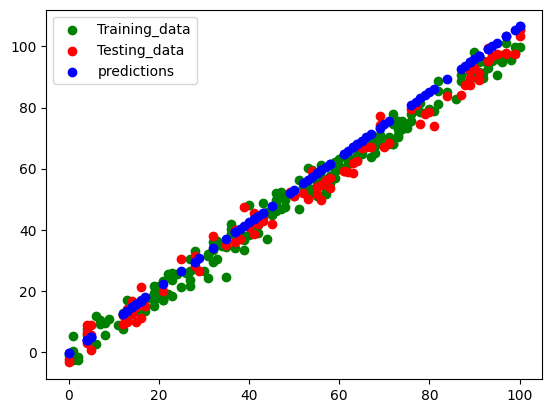

In [47]:
plt.scatter(x_train, y_train, c='g', label='Training_data')
plt.scatter(x_test, y_test, c='r', label='Testing_data')
plt.scatter(x_test, y_predictions, c='b', label='predictions')
plt.legend()
plt.show()

**Evaluate the model**

In [48]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 6ms/step - loss: 4.0045 - mae: 4.0045


[4.004490375518799, 4.004490375518799]

In [49]:
# Using MAE (Mean Absolute Error)
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_predictions))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=4.0044904>

In [50]:
y_predictions.shape

(90, 1)

In [51]:
y_test.shape

(90,)

In [52]:
# Using MSE (Mean Squared Error)
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_predictions))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=22.398153>

In [57]:
 history.history

{'loss': [20.345489501953125,
  4.705055236816406,
  6.363955497741699,
  3.0416390895843506],
 'mae': [20.345489501953125,
  4.705055236816406,
  6.363955497741699,
  3.0416390895843506]}

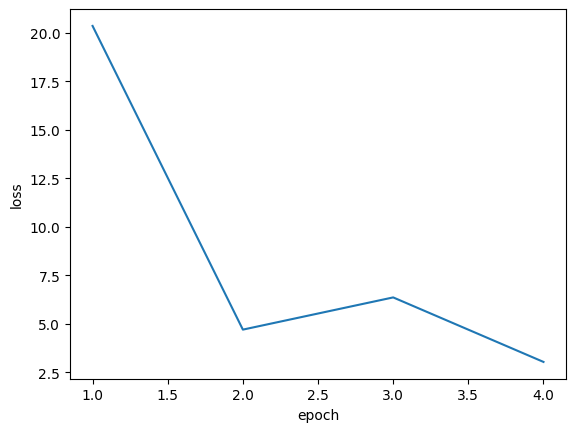

In [58]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

***Model Weights and Baises***

In [59]:
# Let's see finalized weight values and bias values
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[-0.6806942   0.9865959   0.9000472   0.23171026]] 
Biases:
 [ 0.10118308 -0.10121829 -0.10551318  0.09139125]

Weights:
 [[-0.6009976 ]
 [ 0.59803087]
 [ 0.34579536]
 [-1.041615  ]] 
Biases:
 [-0.09495915]
